In [3]:
library(dplyr)
library(ggplot2)

In [4]:
df %>% head()

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

In [113]:
my_theme <- function() {
  # Colors
  color.background = "white"
  color.text = "#22211d"
  # Begin construction of chart
  theme_bw(base_size=15) +
    # Format background colors
    theme(panel.background = element_rect(fill=color.background, color=color.background)) +
    theme(plot.background  = element_rect(fill=color.background, color=color.background)) +
    theme(panel.border     = element_rect(color=color.background)) +
    theme(strip.background = element_rect(fill=color.background, color=color.background)) +
    # Format the grid
    theme(panel.grid.major.y = element_blank()) +
    theme(panel.grid.minor.y = element_blank()) +
    theme(axis.ticks       = element_blank()) +
    # Format the legend
    theme(legend.position = "none") +
    # Format title and axis labels
    theme(plot.title       = element_text(color=color.text, size=20, face = "bold")) +
    theme(axis.title.x     = element_text(size=14, color="black", face = "bold")) +
    theme(axis.title.y     = element_text(size=14, color="black", face = "bold", vjust=1.25)) +
    theme(axis.text.x      = element_text(size=10, vjust=0.5, hjust=0.5, color = color.text)) +
    theme(axis.text.y      = element_text(size=10, color = color.text)) +
    theme(strip.text       = element_text(face = "bold")) +
    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

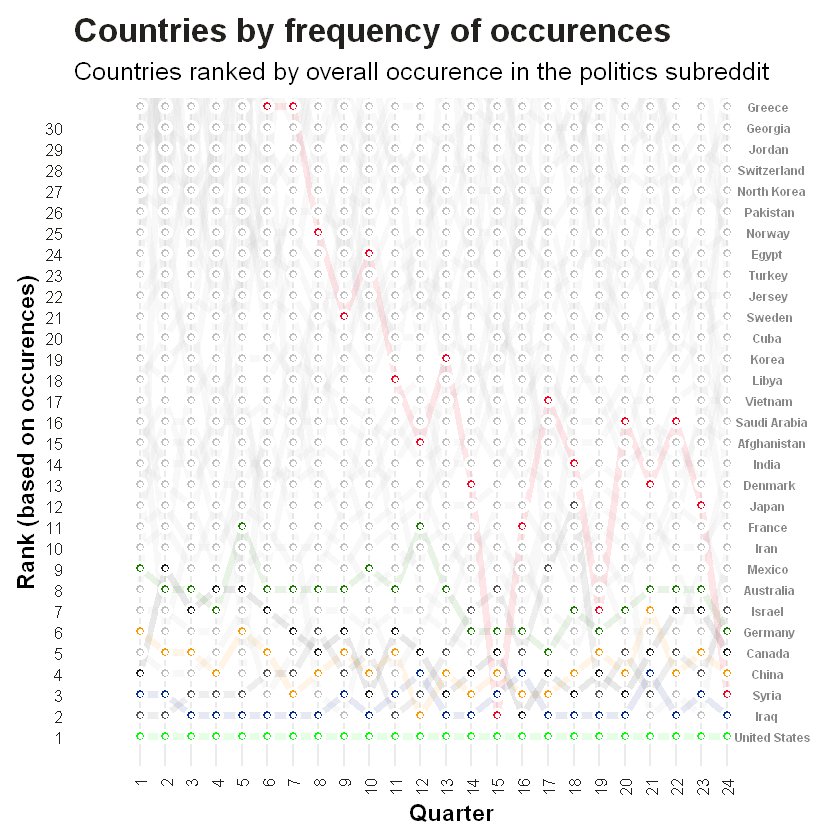

In [308]:
show.top.n <- 30
ggplot(data = quarters, aes(x = month, y = rank, group = country)) +
  geom_line(aes(color = country_col, alpha = 1), size = 2) +
  geom_point(color = "#FFFFFF", size = 4) +
  geom_point(aes(color = country_col, alpha = 2), size = 2) +
  geom_point(color = "#FFFFFF", size = 1) +
  scale_y_reverse(breaks = 1:show.top.n) +
  scale_x_continuous(breaks = 1:24, minor_breaks = 1:24, expand = c(.1, .1)) +
# geom_text(data = quarters %>% filter(month == "1"),
 #           aes(label = country, x = 0.5) , hjust = .85, fontface = "bold", color = "#888888", size = 4) +
  geom_text(data = quarters %>% filter(month == "24"),
            aes(label = country, x = 25.5) , hjust = 0.4, fontface = "bold", color = "#888888", size = 2.5) +
  coord_cartesian(ylim = c(1,show.top.n)) + 
  theme(legend.position = "none") +
  labs(x = "Quarter",
       y = "Rank (based on occurences)",
       title = "Countries by frequency of occurences",
       subtitle = "Countries ranked by overall occurence in the politics subreddit") +
  my_theme() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  scale_color_manual(values = c("#191A1A","#FB9701","#1A7D00","#072C8F", "#545454", "#F70020", "#00FF00", "grey")) 

            
ggsave(file="bench_query_sort.png", width=8, height=6, dpi=300)


In [302]:
labs

[1] 2010-Q1 2010-Q2 2010-Q3 2010-Q4 2011-Q1 2011-Q2 2011-Q3 2011-Q4 2012-Q1
[10] 2012-Q2 2012-Q3 2012-Q4 2013-Q1 2013-Q2 2013-Q3 2013-Q4 2014-Q1 2014-Q2
[19] 2014-Q3 2014-Q4 2015-Q1 2015-Q2 2015-Q3 2015-Q4
24 Levels: 2010-Q1 2010-Q2 2010-Q3 2010-Q4 2011-Q1 2011-Q2 2011-Q3 ... 2015-Q4

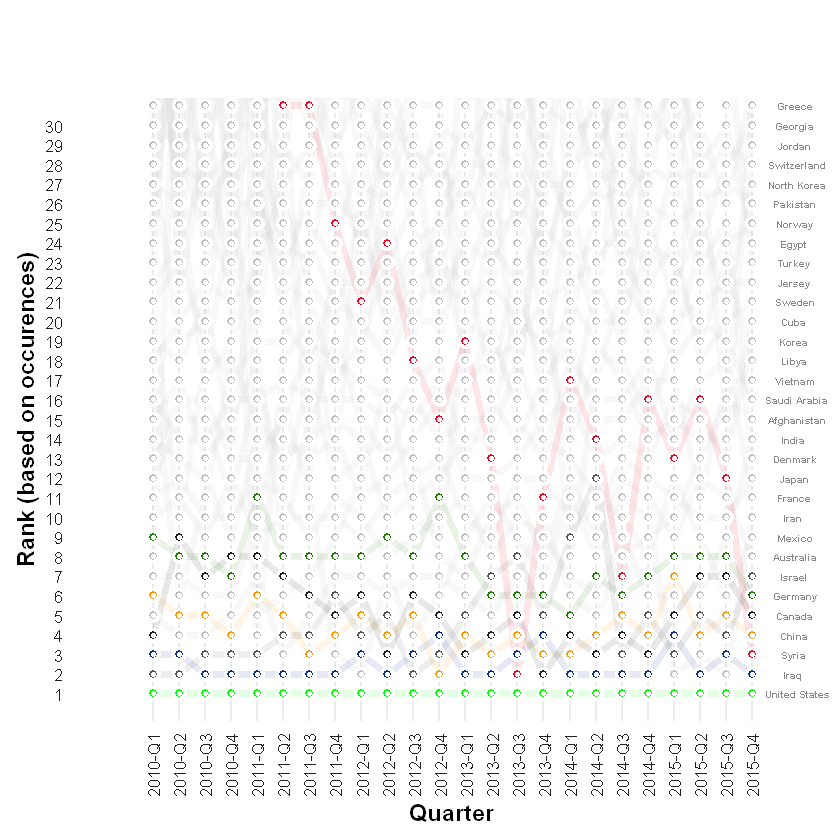

In [327]:
show.top.n <- 30
ggplot(data = quarters, aes(x = date, y = rank, group = country)) +
  geom_line(aes(color = country_col, alpha = 1), size = 2) +
  geom_point(color = "#FFFFFF", size = 4) +
  geom_point(aes(color = country_col, alpha = 2), size = 2) +
  geom_point(color = "#FFFFFF", size = 1) +
  scale_y_reverse(breaks = 1:show.top.n) +
  scale_x_discrete(labels = labs, expand = c(.125, .12)) +
# geom_text(data = quarters %>% filter(month == "1"),
 #           aes(label = country, x = 0.5) , hjust = .85, fontface = "bold", color = "#888888", size = 4) +
  geom_text(data = quarters %>% filter(month == "24"),
            aes(label = country, x = 25.5) , hjust = 0.4, fontface = "bold", color = "#888888", size = 2.2) +
  coord_cartesian(ylim = c(1,show.top.n)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  theme(legend.position = "none") +
  labs(x = "Quarter",
       y = "Rank (based on occurences)",
       title = "",
       subtitle = "") +
  my_theme() +
  scale_color_manual(values = c("#191A1A","#FB9701","#1A7D00","#072C8F", "#545454", "#F70020", "#00FF00", "grey")) +
 theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  theme(plot.title = element_text(hjust = 0.5))
            
ggsave(file="bench_query_sort.png", width=8, height=6, dpi=300)
